In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from config import DATA_DIR

In [2]:
# Load the data
df = pd.read_csv(os.path.join(DATA_DIR, 'sample_contributions.csv'))

df.head()

/tmp/ipykernel_27917/3386268877.py:2: DtypeWarning: Columns (40,42,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR, 'sample_contributions.csv'))


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,cycle,transaction.id,transaction.type,amount,date,bonica.cid,contributor.name,...,efec.transaction.id.orig,bk.ref.transaction.id,efec.org.orig,efec.comid.orig,efec.form.type,excluded.from.scaling,contributor.cfscore,candidate.cfscore,Repeat_Donor,scaled_amount
0,0,0,1254,1980,indv:1980:100459,15,300.0,1980-06-15,3917564811,"masterson, harris",...,NaN,NaN,NaN,NaN,NaN,0,1.10,1.29,True,0.001500
1,1,1,1256,1980,indv:1980:100633,15,1000.0,1980-10-09,3186118164,"firestone, alan j",...,NaN,NaN,NaN,NaN,NaN,0,0.10,NaN,False,0.005000
2,2,2,1263,1980,indv:1980:101460,15,500.0,1980-11-28,3793209611,"sonosky, marvin j",...,NaN,NaN,NaN,NaN,NaN,0,-0.26,-0.35,False,0.002500
3,3,3,1270,1980,indv:1980:102308,24T,25.0,1980-06-10,5000003695229625,"tramel, a w",...,NaN,NaN,NaN,NaN,NaN,1,0.97,NaN,False,0.000125
4,4,4,1272,1980,indv:1980:102511,15,250.0,1980-06-30,2442754885,"thomson, g v",...,NaN,NaN,NaN,NaN,NaN,1,0.67,0.63,False,0.001250


It looks like some of the contributions are not from individuals. For the purpose of this project, we'll only do analysis on individual contributors, which we'll consider to be people with a first and last name.

We should also process bonica.cid as a string, date as a date, etc.

In [3]:
# Process the id column
df['bonica.cid'] = df['bonica.cid'].astype(float).round(0).astype(int)

# Process the date column, eliminating rows with missing dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Eliminate records without a first and last name
df = df[~df['contributor.fname'].isnull()]
df = df[~df['contributor.lname'].isnull()]

In [4]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,cycle,transaction.id,transaction.type,amount,date,bonica.cid,contributor.name,...,efec.transaction.id.orig,bk.ref.transaction.id,efec.org.orig,efec.comid.orig,efec.form.type,excluded.from.scaling,contributor.cfscore,candidate.cfscore,Repeat_Donor,scaled_amount
0,0,0,1254,1980,indv:1980:100459,15,300.0,1980-06-15,3917564811,"masterson, harris",...,NaN,NaN,NaN,NaN,NaN,0,1.10,1.29,True,0.001500
1,1,1,1256,1980,indv:1980:100633,15,1000.0,1980-10-09,3186118164,"firestone, alan j",...,NaN,NaN,NaN,NaN,NaN,0,0.10,NaN,False,0.005000
2,2,2,1263,1980,indv:1980:101460,15,500.0,1980-11-28,3793209611,"sonosky, marvin j",...,NaN,NaN,NaN,NaN,NaN,0,-0.26,-0.35,False,0.002500
3,3,3,1270,1980,indv:1980:102308,24T,25.0,1980-06-10,5000003695229625,"tramel, a w",...,NaN,NaN,NaN,NaN,NaN,1,0.97,NaN,False,0.000125
4,4,4,1272,1980,indv:1980:102511,15,250.0,1980-06-30,2442754885,"thomson, g v",...,NaN,NaN,NaN,NaN,NaN,1,0.67,0.63,False,0.001250


In [5]:
# What's the minimum and maximum date?
print(df['date'].min(), df['date'].max())

# Eliminate all dates after 2000 or before 1980
df = df[df['date'] >= '1980-01-01']
df = df[df['date'] <= '2000-12-31']

print(df['date'].min(), df['date'].max())

1980-01-01 00:00:00 2000-11-30 00:00:00
1980-01-01 00:00:00 2000-11-30 00:00:00


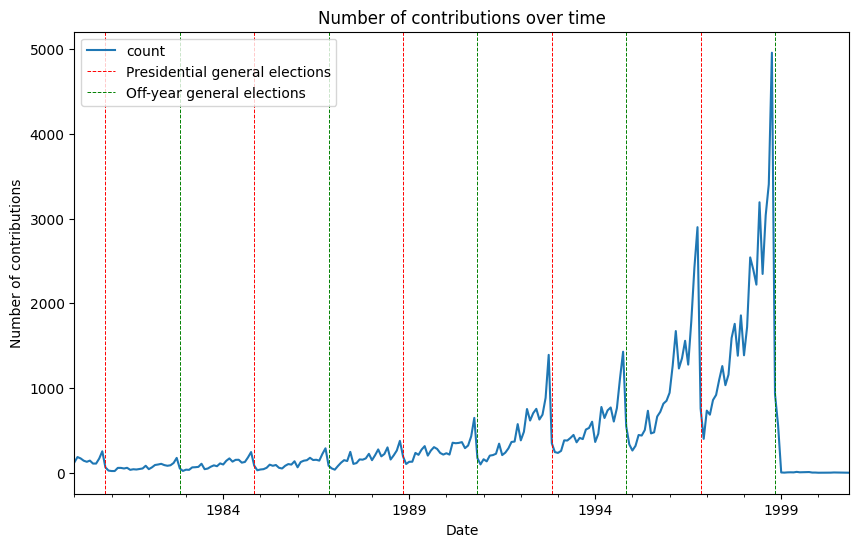

In [6]:
# Plot the number of contributions over time, grouping by month
plt.figure(figsize=(10, 6))
grouped = df['date'].dt.to_period('M').value_counts().sort_index()
grouped.plot()

# Add vertical dashed lines at the major general election dates
plt.axvline('1980-11-04', color='r', linestyle='--', linewidth=0.7, label='Presidential general elections')
plt.axvline('1982-11-02', color='g', linestyle='--', linewidth=0.7, label='Off-year general elections')
plt.axvline('1984-11-06', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1986-11-04', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1988-11-08', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1990-11-06', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1992-11-03', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1994-11-08', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1996-11-05', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1998-11-03', color='g', linestyle='--', linewidth=0.7)

plt.xlabel('Date')
plt.ylabel('Number of contributions')
plt.title('Number of contributions over time')
plt.legend(loc='upper left')
plt.show()

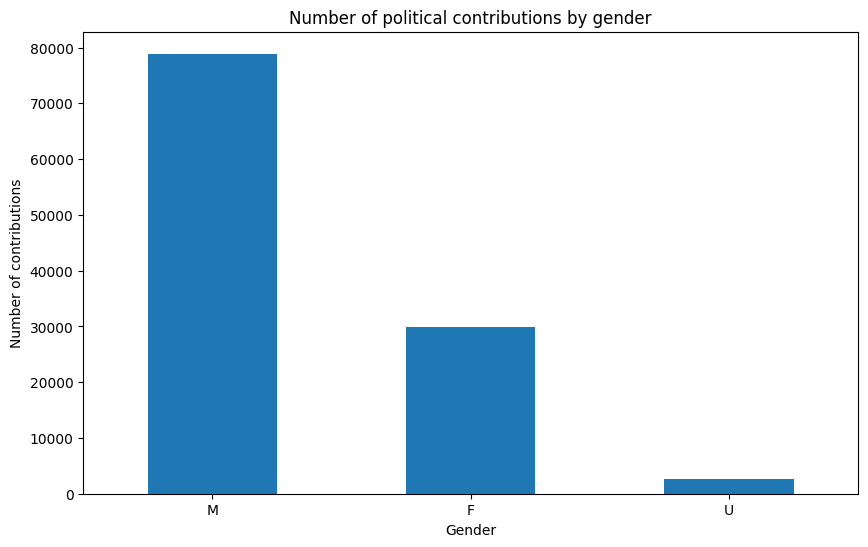

In [7]:
plt.figure(figsize=(10, 6))
df['contributor.gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of contributions')
plt.title('Number of political contributions by gender')
plt.xticks(rotation=0)
plt.show()


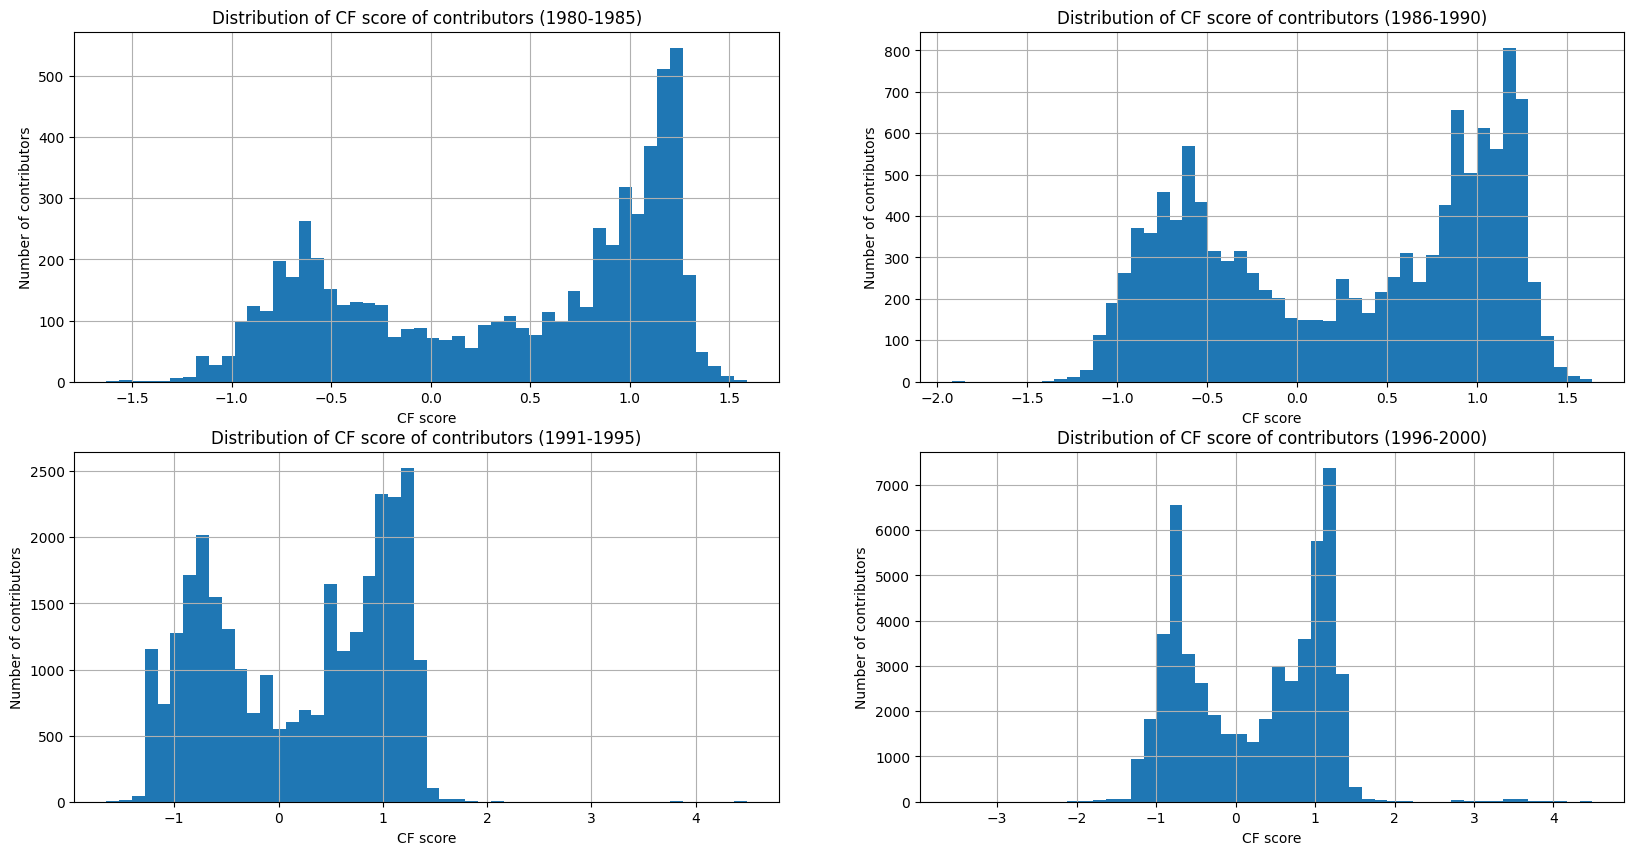

In [8]:
# Split the time period into four equal intervals
time_periods = ['1980-1985', '1986-1990', '1991-1995', '1996-2000']

# Plot the distribution of CF score of contributors over time
plt.subplots(2, 2, figsize=(20, 10))
for i, period in enumerate(time_periods):
    plt.subplot(2, 2, i + 1)
    df[df['date'].dt.year.between(int(period[:4]), int(period[-4:]))]['contributor.cfscore'].hist(bins=50)
    # plt.xlim(-2, 2)
    plt.xlabel('CF score')
    plt.ylabel('Number of contributors')
    plt.title(f'Distribution of CF score of contributors ({period})')


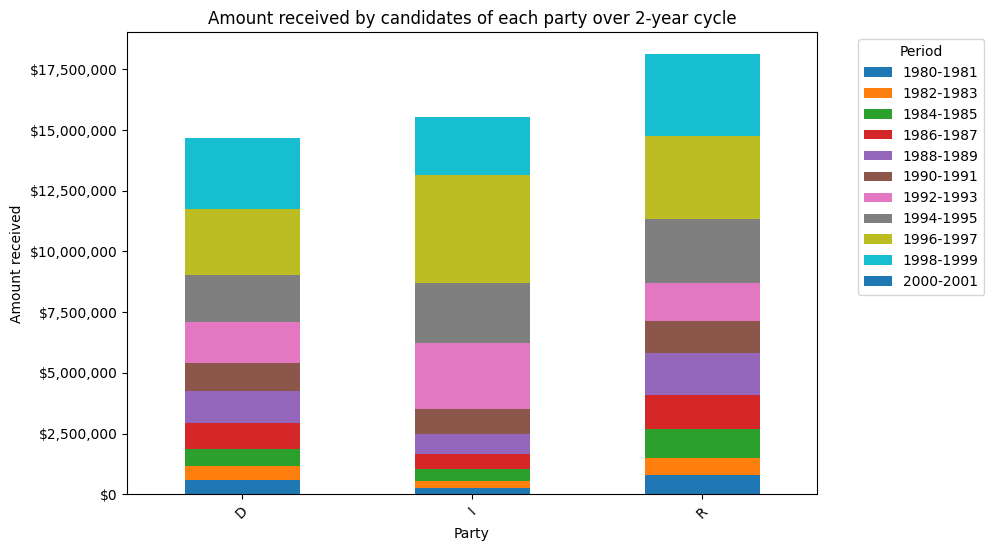

In [9]:
import matplotlib.ticker as ticker
# Number of dollars received by candidates of each party over time

# Just for this graph, group non-major parties together (100 = D, 200 = R, all else = I)
df_party = df.copy()

def party(x):
    try:
        if int(x) == 100:
            return 'D'
        elif int(x) == 200:
            return 'R'
        else:
            return 'I'
    except ValueError:
        return 'I'
    

df_party['recipient.party'] = df_party['recipient.party'].apply(party)

# Calculate periods
min_year = df_party['date'].dt.year.min()
df_party['period'] = ((df_party['date'].dt.year - min_year) / 2).astype(int)

# Create a label for each period that shows the start and end year
def period_label(row):
    start_year = min_year + row['period'] * 2
    return f'{start_year}-{start_year + 1}'

df_party['period_label'] = df_party.apply(period_label, axis=1)

# Group by party and period_label, then sum amounts
grouped = df_party.groupby(['recipient.party', 'period_label'])['amount'].sum().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adjustments and formatting
plt.subplots_adjust(right=0.7)
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left', labels=grouped.columns)
plt.xlabel('Party')
plt.ylabel('Amount received')
plt.title('Amount received by candidates of each party over 2-year cycle')
plt.xticks(rotation=45) # Rotate labels to fit them better

# Money formatter
def money_formatter(x, pos):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(money_formatter))

plt.show()

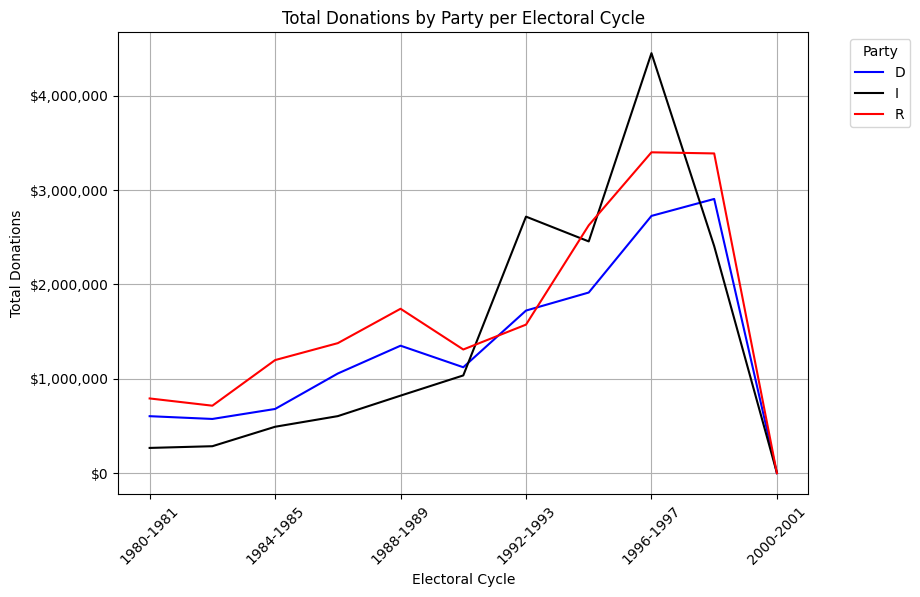

In [10]:
# Adjusted plotting section with specified line colors
fig, ax = plt.subplots(figsize=(12, 6))

party_grouped = df_party.groupby(['period_label', 'recipient.party'])['amount'].sum().unstack(fill_value=0)

# Specify colors for each line according to the party
colors = {'D': 'blue', 'R': 'red', 'I': 'black'}

# Check and order colors according to the party order in 'grouped' DataFrame
line_colors = [colors[party] for party in party_grouped.columns if party in colors]

# for party in party_grouped.columns:

# Plot each party as a line with specified colors
party_grouped.plot(kind='line', ax=ax, color=line_colors)

# Adjustments and formatting
plt.subplots_adjust(right=0.7)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Electoral Cycle')
plt.ylabel('Total Donations')
plt.title('Total Donations by Party per Electoral Cycle')
plt.xticks(rotation=45)

# Use custom formatter for the y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(money_formatter))

plt.grid(True)
plt.show()

### Target Exploration

#### Negative Target Amount

In [11]:
len(df[df['amount'] < 0])

1623

#### Outliers

In [12]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
outlier_count = outliers.shape[0]

lower_bound, upper_bound, outlier_count

(-687.5, 1212.5, 3624)

#### Distribution

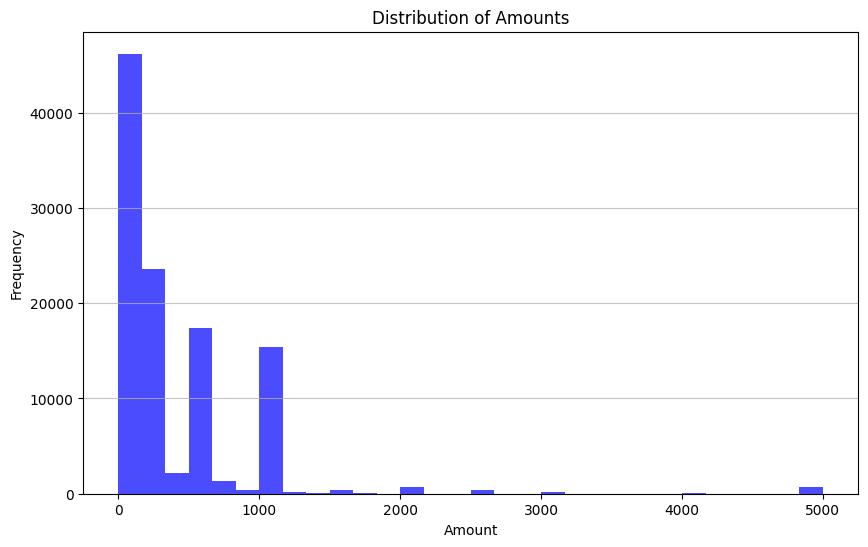

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['amount'], bins=30, alpha=0.7, color='blue', range=(0, 5000))
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [14]:
# total repeat donors
n_donors = df['contributor.name'].nunique()
n_transactions = df.shape[0]
print("unique contributors:", n_donors)
print("total number of transactions:", df.shape[0])
print("repeat donors:", n_transactions - n_donors)

unique contributors: 102677
total number of transactions: 111425
repeat donors: 8748


The overwhelming majority are first-time donors, but a non-trivial number have made repeat donations. We want to analyze repeat donors separately, as a special case. 

Also, for future analysis, we want to convert dollar amounts to logits, to prevent scaling issues.

In [15]:
df['Repeat_Donor'] = df['contributor.name'].duplicated(keep=False)

# Scale the dollar amount by 5000
scale_factor = np.float64(5000.0)
df['scaled_amount'] = df['amount'].astype(np.float64) / scale_factor

df.to_csv(os.path.join(DATA_DIR, 'sample_contributions.csv'))